## introduction 


  ## Overview
   I select to analyze the 'tmdb-movies.csv' to complecte my project 2 in udacity for data analyst nano-degree.
   
   tmdb-movies dataset contains almost 11 thounsed movei  & 21 coulmns collected from imdb. 
    

  ## Question that can analyised from this data set
    1- what is the max profit 
    2- what is the min profit
    3- what is the max budget 
    4- what is the min budget
    5- what is the max revenue 
    6- what is the min revenue
    7- what is the max runtime 
    8- what is the min runtime
    9- what is the less 75% of runtime mintues?
    10- what is the less 50% of runtime mintues?
    11- what is the less 25% of runtime mintues?
    12- what is the mean of runtime?
    13- what is the top 5 years that movies earned?
    14- what is the less 5 years that movies earned?
    15-what is the top 5 kinds of  movies that get more earned?
    16-What is the mean of profit_earned?
    17-What is the mean of revenue?



## Resources :

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html
http://www.datasciencemadesimple.com/select-row-maximum-minimum-value-python-pandas/
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html
    


Load the Dataset

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime as dt

df=pd.read_csv('tmdb-movies.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

After investigate the data we decide to split the geners & drop the unnecessary coulmns.

In [12]:
#split the genres
re=pd.Series(df['genres']).str.get_dummies(sep='|')
#merge to the data frame 
df0=pd.merge(df, re, left_index=True, right_index=True)


# drop the  coulmns
df1=df0.drop(columns=['genres','homepage','tagline', 'overview','id','imdb_id'])



Remove '0' from budget, revenue

In [13]:
# creating a seperate list of revenue and budget column
list1=['budget', 'revenue']

#this will replace all the value from '0' to NAN in the list
df1[list1] = df1[list1].replace(0, np.NAN)

#Removing all the row which has NaN value in list1
df1.dropna(subset = list1, inplace = True)
df1.shape



(3855, 35)

Change the release_date format from object to correct date format

In [14]:

df1.release_date = pd.to_datetime(df1['release_date'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3855 entries, 0 to 10848
Data columns (total 35 columns):
popularity              3855 non-null float64
budget                  3855 non-null float64
revenue                 3855 non-null float64
original_title          3855 non-null object
cast                    3851 non-null object
director                3854 non-null object
keywords                3717 non-null object
runtime                 3855 non-null int64
production_companies    3809 non-null object
release_date            3855 non-null datetime64[ns]
vote_count              3855 non-null int64
vote_average            3855 non-null float64
release_year            3855 non-null int64
budget_adj              3855 non-null float64
revenue_adj             3855 non-null float64
Action                  3855 non-null int64
Adventure               3855 non-null int64
Animation               3855 non-null int64
Comedy                  3855 non-null int64
Crime                   3855 n

In [15]:
df1['runtime'] =df1['runtime'].replace(0, np.NAN)


Change type of budget revenue to int

In [16]:
ct=['budget', 'revenue']
#changing data type
df1[ct]=df1[ct].applymap(np.int64)
#printing the changed information
df1.dtypes

popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
director                        object
keywords                        object
runtime                          int64
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
Action                           int64
Adventure                        int64
Animation                        int64
Comedy                           int64
Crime                            int64
Documentary                      int64
Drama                            int64
Family                           int64
Fantasy                          int64
Foreign                          int64
History                  

Insert new coulmn to the data set which is profit_earned, there is two way to add the coulmn , i choose insert function
because i can control in which index i will add the coulmn

In [17]:
#insert function with three parameters(index of the column in the dataset, name of the column, value to be inserted)
df1.insert(3,'profit_earned',df1['revenue']-df1['budget'])
#df1['profit_earned'] = df1['revenue'] - df1['budget']



#previewing the changes in the dataset
df1.head(2)

,popularity,budget,revenue,profit_earned,original_title,cast,director,keywords,runtime,production_companies,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,32.985763,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Universal Studios|Amblin Entertainment|Legenda...,...,0,0,0,0,0,1,0,1,0,0
1,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Village Roadshow Pictures|Kennedy Miller Produ...,...,0,0,0,0,0,1,0,1,0,0


below queestion :
    1- what is the max profit 
    2- what is the min profit


In [18]:
def cex(coul):
    
    highest=df1.loc[df1[coul].idxmax()]
    lowest=df1.loc[df1[coul].idxmin()]
    info=pd.concat([highest, lowest],axis=1)
    return info

cex('profit_earned')


,1386,2244
popularity,9.43277,0.25054
budget,237000000,425000000
revenue,2781505847,11087569
profit_earned,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
keywords,culture clash|future|space war|space colony|so...,assassin|small town|revenge|deception|super speed
runtime,162,100
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Boram Entertainment Inc.


Avatar  shows the highest earned profit  2544505847 $

The Warriors Way  shows the lowest earned profit  -413912431$

below queestion :
    1- what is the max budget 
    2- what is the min budget

In [19]:
cex('budget')



,2244,2618
popularity,0.25054,0.090186
budget,425000000,1
revenue,11087569,100
profit_earned,-413912431,99
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
keywords,assassin|small town|revenge|deception|super speed,restaurant|neighbor|dog|ring
runtime,100,95
production_companies,Boram Entertainment Inc.,Alcon Entertainment|Dinamo Entertainment


The Warriors Way has the max budget which is 425000000$
The Lost&Found Way has the min budget which is 1$


below question :
    1- what is the max revenue 
    2- what is the min revenue

In [20]:

cex('revenue')

,1386,5067
popularity,9.43277,0.462609
budget,237000000,6000000
revenue,2781505847,2
profit_earned,2544505847,-5999998
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
keywords,culture clash|future|space war|space colony|so...,NaN
runtime,162,94
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Lions Gate Films|Cruise/Wagner Productions|Bau...


Avatar  shows the highest revenu 2781505847$

Shattered Glass shows the less revenu 2$



below question :
    1- what is the max runtime 
    2- what is the min runtime

In [21]:

cex('runtime')

,2107,5162
popularity,0.534192,0.208637
budget,18000000,10
revenue,871279,5
profit_earned,-17128721,-5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
keywords,gun|car bomb|tv mini-series|terrorism|opec,NaN
runtime,338,15
production_companies,Egoli Tossell Film AG|Canal+|Arte France|Films...,Studio 4Â°C


Carlos has the longest runtime which is 338 minutes
Kids Story the shortest runtime which is 15 minutes


below question :
    1- what is the less 75% of runtime mintues?
    2- what is the less 50% of runtime mintues?
    3- what is the less 25% of runtime mintues?
    4- what is the mean of runtime?

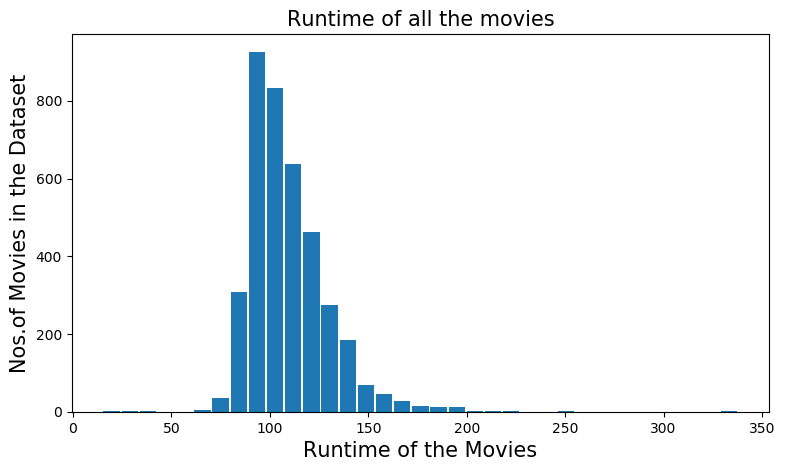

In [22]:
#plotting a histogram of runtime of movies

#giving the figure size(width, height)
plt.figure(figsize=(9,5), dpi = 100)

#On x-axis 
plt.xlabel('Runtime of the Movies', fontsize = 15)
#On y-axis 
plt.ylabel('Nos.of Movies in the Dataset', fontsize=15)
#Name of the graph
plt.title('Runtime of all the movies', fontsize=15)

#giving a histogram plot
plt.hist(df1['runtime'], rwidth = 0.9, bins =35)
#displays the plot
plt.show()

In [23]:
df1['runtime'].describe()

count    3855.000000
mean      109.215824
std        19.922166
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

From above graph and calculation we found:
    1- 25% of movie is less than 95 minutes
    2- 50% of movie is less than 106 minutes
    3- 75% of movie is less than 119 minutes
    4- the mean is 109 minutes

below question :
    1- what is the top 5 years that movies earned?
    2- what is the less 5 years that movies earned?

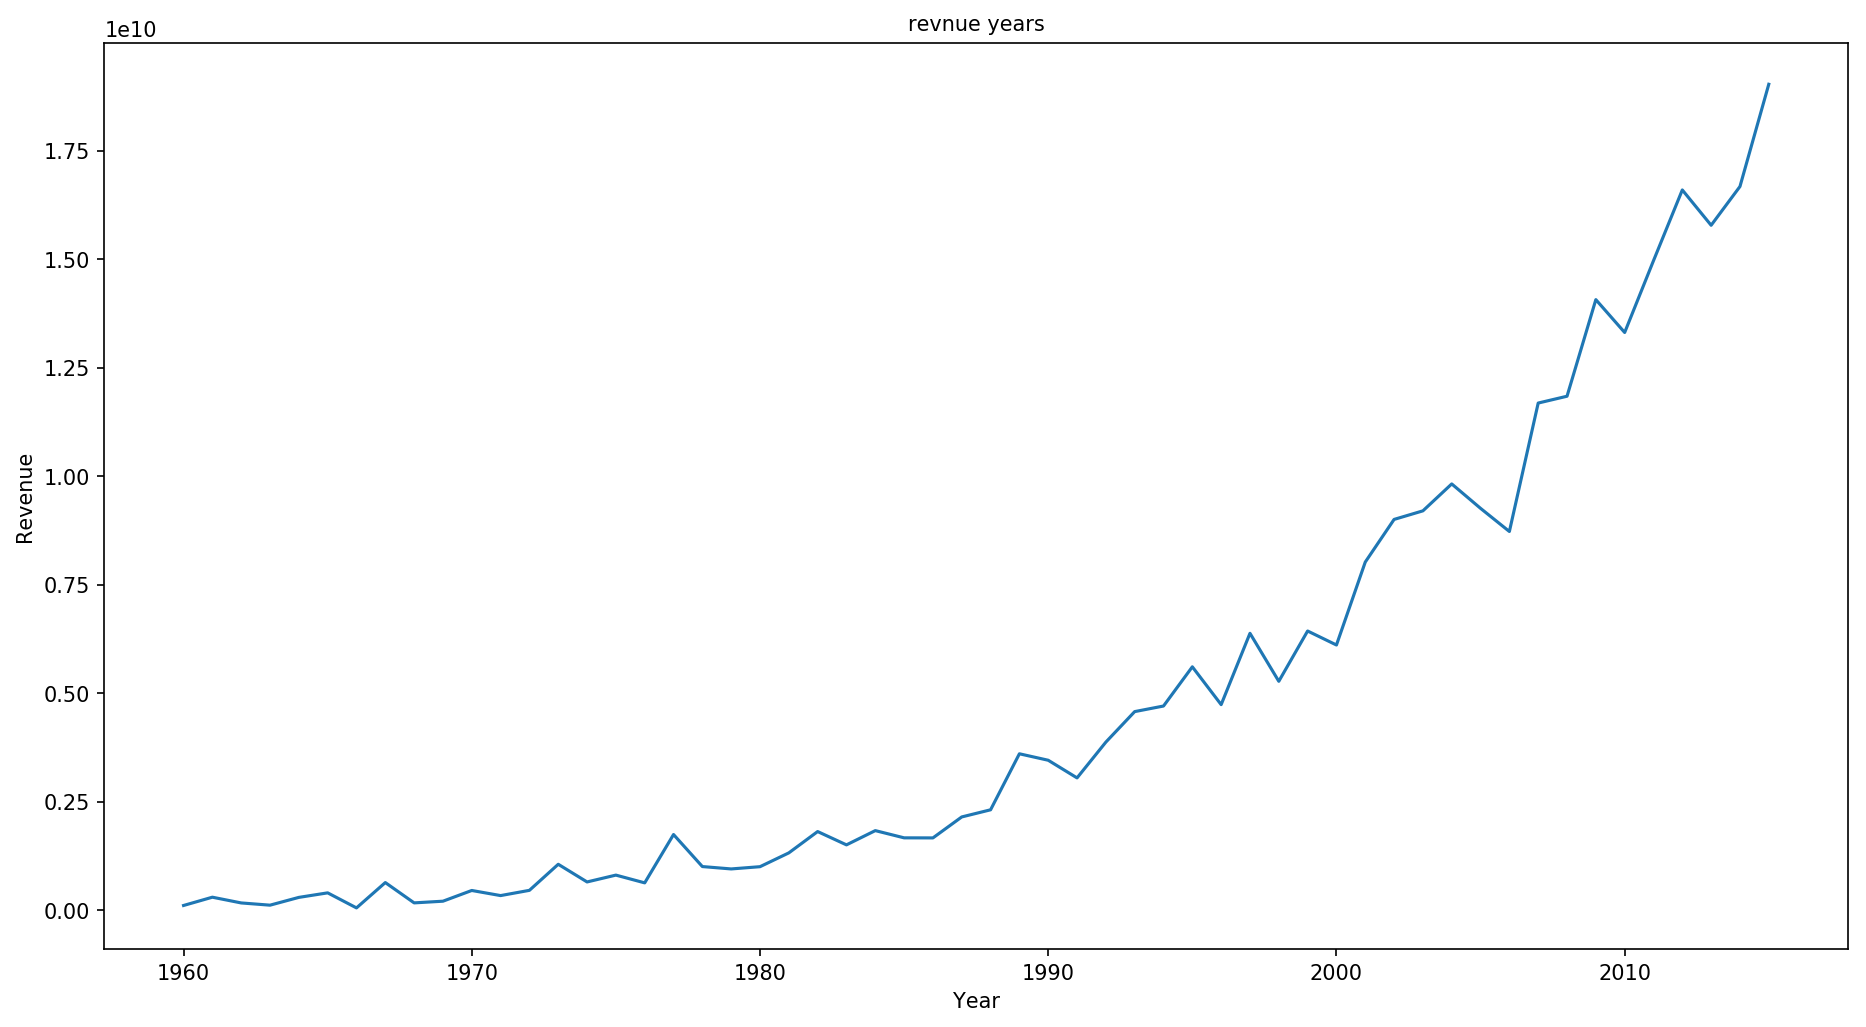

In [24]:
#figure size

profits_year = df1.groupby('release_year')['profit_earned'].sum()

plt.figure(figsize=(15,8), dpi=150)

plt.xlabel("Year", fontsize=10)

plt.ylabel("Revenue", fontsize=10)

plt.title("revnue years", fontsize=10)

plt.plot(profits_year)
plt.show()

In [25]:
lowest5 = df1.groupby('release_year')['profit_earned'].sum().sort_values().head(5)#asending=True

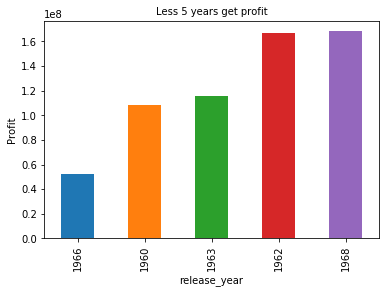

In [26]:
plt.ylabel("Profit", fontsize=15)
plt.title("Less 5 years get profit", fontsize=15)
lowest5.plot.bar()

from above graph we see the lowest 5 years of revenue:
    1- 1966
    2- 1960
    3- 1963
    4- 1962
    5- 1968

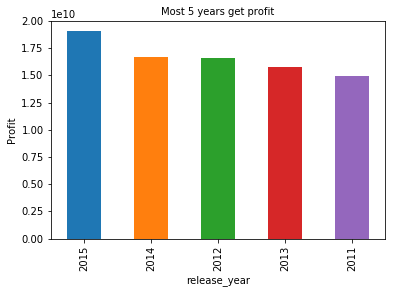

In [27]:
highest5 = df1.groupby('release_year')['profit_earned'].sum().sort_values(ascending=False).head(5)

plt.ylabel("Profit", fontsize=15)
plt.title("Most 5 years get profit", fontsize=15)

highest5.plot.bar()

from above graph we see the highest 5 years of revenue:
    1- 2015
    2- 2014
    3- 2012
    4- 2013
    5- 2011

below question :
    1- what is the top 5 kinds of  movies that get more earned?

In [29]:
xx=df1.groupby('profit_earned')['Action','Adventure','Animation','Comedy','Crime','Documentary','Drama','Family','Fantasy','Foreign','History',
'Horror','Music','Mystery','Romance','Science Fiction','TV Movie','Thriller','War','Western'].sum().max().sort_values(ascending=False).head(5)


 

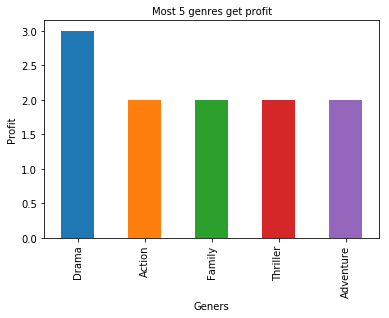

In [30]:
plt.xlabel("Geners", fontsize=15)
plt.ylabel("Profit", fontsize=15)
plt.title("Most 5 genres get profit", fontsize=10)

xx.plot.bar()



In [31]:
df1['profit_earned'].mean()




70457104.37821011

In [32]:
df1['revenue'].mean()

107658932.66977951

from above graph we see the top 5 kinds of movies are:
    1- Drama
    2- Action
    3- Family
    4- Thriller
    5- Adventure

In [ ]:
df1.plot.scatter(x='release_year',y='popularity',c='DarkBlue',)


## Conclusions:

This was a very interesting data analysis. We came out with some very interesting facts about movies. After this analysis we can conclude following:

Average duration of the movie  109 minutes.

Average revenue of the movie  107 milliion$

Average profit of the movie  70 milliion$

the top 5 geners movies get profits are:
    1- Drama
    2- Action
    3- Family
    4- Thriller
    5- Adventure
    
    the highest 5 years of revenue:
    1- 2015
    2- 2014
    3- 2012
    4- 2013
    5- 2011
    
According to the top 5 Genres to ensure the revune to be high the procuder should be consider the below geners : Drama ,Action, Family ,Thriller, Adventure.


## Limitaion:

For the  dataset it was very good and nice to work with real-data but we don't need for homepage','tagline', 'overview','id','imdb_id' , those data will be load on how will analyze the data.

If there is a coulmn show what is cinma show the movies or  which country has most watched movie